In [54]:
import pandas as pd 
import numpy as np
import sklearn.cluster as skc
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [3]:
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


# Logistic Regression


In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5,
    'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10,
    'Nov': 11, 'Dec': 12
}

# Replace month names with their corresponding numeric values
for month in month_mapping:
    X.columns = [col.replace(month, str(month_mapping[month])) for col in X.columns]

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
np.random.seed(1)
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 1)

In [9]:
print((y_train == 'M').sum())
print((y_train == 'B').sum())

Diagnosis    170
dtype: int64
Diagnosis    285
dtype: int64


In [10]:
ros =  RandomOverSampler(random_state=0)
x_train,y_train = ros.fit_resample(X,y)

In [11]:
print((y_train == 'M').sum())
print((y_train == 'B').sum())


Diagnosis    357
dtype: int64
Diagnosis    357
dtype: int64


In [12]:
Cs = np.logspace(-5, 5, 20)
Logistic_model= LogisticRegressionCV(Cs=Cs, cv=5, tol=0.05, solver="saga", random_state=10).fit(x_train,y_train)

C:\Users\juan_\anaconda3\envs\DeepLearningTest\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
Breast_cancer_predict = cross_val_predict(Logistic_model,x_test,y_test)
Breast_cancer_predict

C:\Users\juan_\anaconda3\envs\DeepLearningTest\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\juan_\anaconda3\envs\DeepLearningTest\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\juan_\anaconda3\envs\DeepLearningTest\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\juan_\anaconda3\envs\DeepLearningTest\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vecto

array(['B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B'], dtype=object)

In [14]:
Breast_cancer_proba = Logistic_model.predict_proba(x_test)
Breast_cancer_proba

array([[8.22044239e-01, 1.77955761e-01],
       [2.62987246e-02, 9.73701275e-01],
       [9.79502052e-01, 2.04979481e-02],
       [1.36381002e-02, 9.86361900e-01],
       [8.66666875e-02, 9.13333312e-01],
       [7.67705920e-03, 9.92322941e-01],
       [2.30405932e-03, 9.97695941e-01],
       [2.03012451e-01, 7.96987549e-01],
       [9.87396247e-01, 1.26037526e-02],
       [9.55510429e-01, 4.44895706e-02],
       [9.92972793e-01, 7.02720663e-03],
       [6.51169386e-03, 9.93488306e-01],
       [3.37792008e-02, 9.66220799e-01],
       [9.87819829e-01, 1.21801713e-02],
       [5.17108904e-01, 4.82891096e-01],
       [8.80201363e-01, 1.19798637e-01],
       [9.96827224e-01, 3.17277609e-03],
       [9.77553620e-01, 2.24463801e-02],
       [9.98154618e-01, 1.84538232e-03],
       [9.84120472e-04, 9.99015880e-01],
       [9.83972195e-01, 1.60278045e-02],
       [9.85063249e-01, 1.49367510e-02],
       [4.31831389e-04, 9.99568169e-01],
       [9.52904993e-01, 4.70950075e-02],
       [8.549239

In [15]:
Model_Score = Logistic_model.score(x_test,y_test)
Model_Score

0.9824561403508771

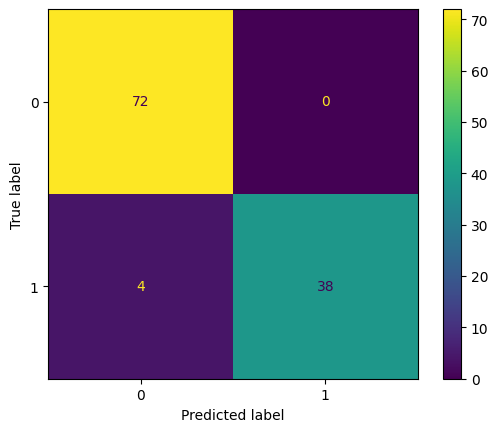

In [16]:
Con_matrix = confusion_matrix(y_test, Breast_cancer_predict)
Display = ConfusionMatrixDisplay(Con_matrix)
Display.plot()

In [17]:
print(classification_report(y_test, Breast_cancer_predict))

              precision    recall  f1-score   support

           B       0.95      1.00      0.97        72
           M       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



## K-nearest neighbours 

In [18]:
knn_model = KNeighborsClassifier()
grid_params = {'n_neighbors': range(1,15)}
gs = GridSearchCV(knn_model,grid_params, cv = 5, verbose = 1)
results = gs.fit(x_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


C:\Users\juan_\anaconda3\envs\DeepLearningTest\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\juan_\anaconda3\envs\DeepLearningTest\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\juan_\anaconda3\envs\DeepLearningTest\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\juan_\anaconda3\envs\DeepLearningTest\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-

In [19]:
results.best_params_

{'n_neighbors': 1}

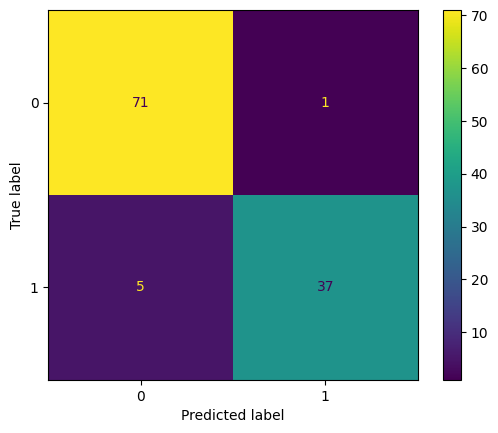

In [79]:
x_test = np.array(x_test)
best_knn_model = KNeighborsClassifier(n_neighbors= 3).fit(x_train, y_train)
knn_predict = cross_val_predict(best_knn_model, x_test, y_test)
cm = confusion_matrix(y_test,knn_predict)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [21]:
best_knn_model.predict_proba(x_test)

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

In [22]:
kneighbors_score = best_knn_model.score(x_test,y_test)
kneighbors_score

1.0

In [23]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           B       0.93      0.99      0.96        72
           M       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



## Naive Bayes

In [63]:
Naive_model = GaussianNB().fit(x_train,y_train)

In [25]:
Naive_model.predict_proba(x_test)

array([[1.26843970e-008, 9.99999987e-001],
       [3.79982835e-007, 9.99999620e-001],
       [1.00000000e+000, 7.92956940e-012],
       [1.91887933e-016, 1.00000000e+000],
       [9.97269763e-001, 2.73023741e-003],
       [1.96600984e-011, 1.00000000e+000],
       [1.05272283e-072, 1.00000000e+000],
       [6.63517094e-023, 1.00000000e+000],
       [1.00000000e+000, 1.76087343e-015],
       [9.99999993e-001, 6.94702027e-009],
       [1.00000000e+000, 4.14419996e-016],
       [3.89713511e-012, 1.00000000e+000],
       [7.27334851e-018, 1.00000000e+000],
       [1.00000000e+000, 2.31985982e-015],
       [9.99999956e-001, 4.42254048e-008],
       [9.99997393e-001, 2.60721255e-006],
       [1.00000000e+000, 9.19807332e-018],
       [1.00000000e+000, 1.59035522e-013],
       [9.68708945e-001, 3.12910550e-002],
       [3.57721215e-055, 1.00000000e+000],
       [1.00000000e+000, 8.00686646e-015],
       [1.00000000e+000, 1.34174084e-014],
       [2.29367942e-033, 1.00000000e+000],
       [1.0

In [67]:
predict_bayes = cross_val_predict(Naive_model,x_test,y_test)

In [70]:
Naive_score = Naive_model.score(x_test,y_test)
Naive_score

0.9473684210526315

In [68]:
print(classification_report(y_test,predict_bayes))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        72
           1       0.93      0.90      0.92        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



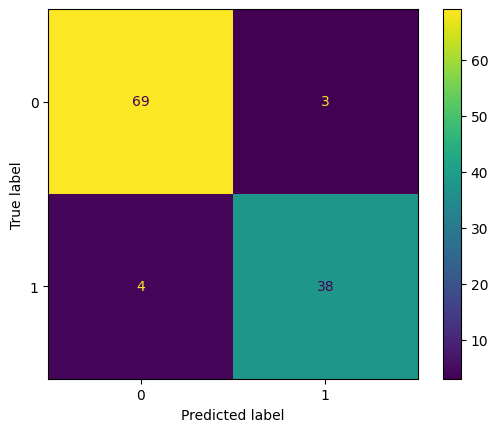

In [78]:
bayes_matrix = confusion_matrix(y_test,predict_bayes)
display_bayes = ConfusionMatrixDisplay(bayes_matrix)
display_bayes.plot()

## Decision tree

In [71]:
tree_model = DecisionTreeClassifier().fit(x_train,y_train)
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [31]:
tree_model.predict_proba(x_test)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [72]:
score_tree = tree_model.score(x_test, y_test)
score_tree

0.9473684210526315

In [73]:
predict_tree = cross_val_predict(tree_model,x_test,y_test)

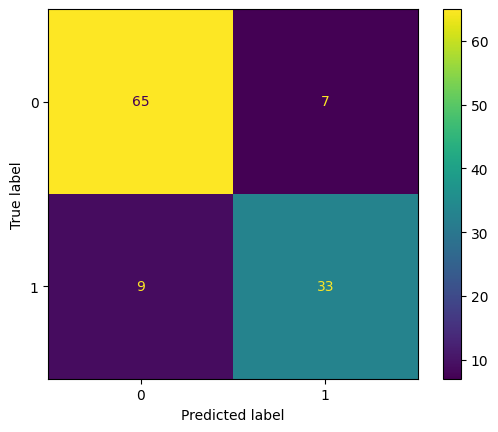

In [74]:
tree_matrix = confusion_matrix(y_test, predict_tree)
tree_display = ConfusionMatrixDisplay(tree_matrix)
tree_display.plot()

In [35]:
feature_names = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
    'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]


X_df = pd.DataFrame(X, columns=feature_names)


feature_names = list(X_df.columns)
print(feature_names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


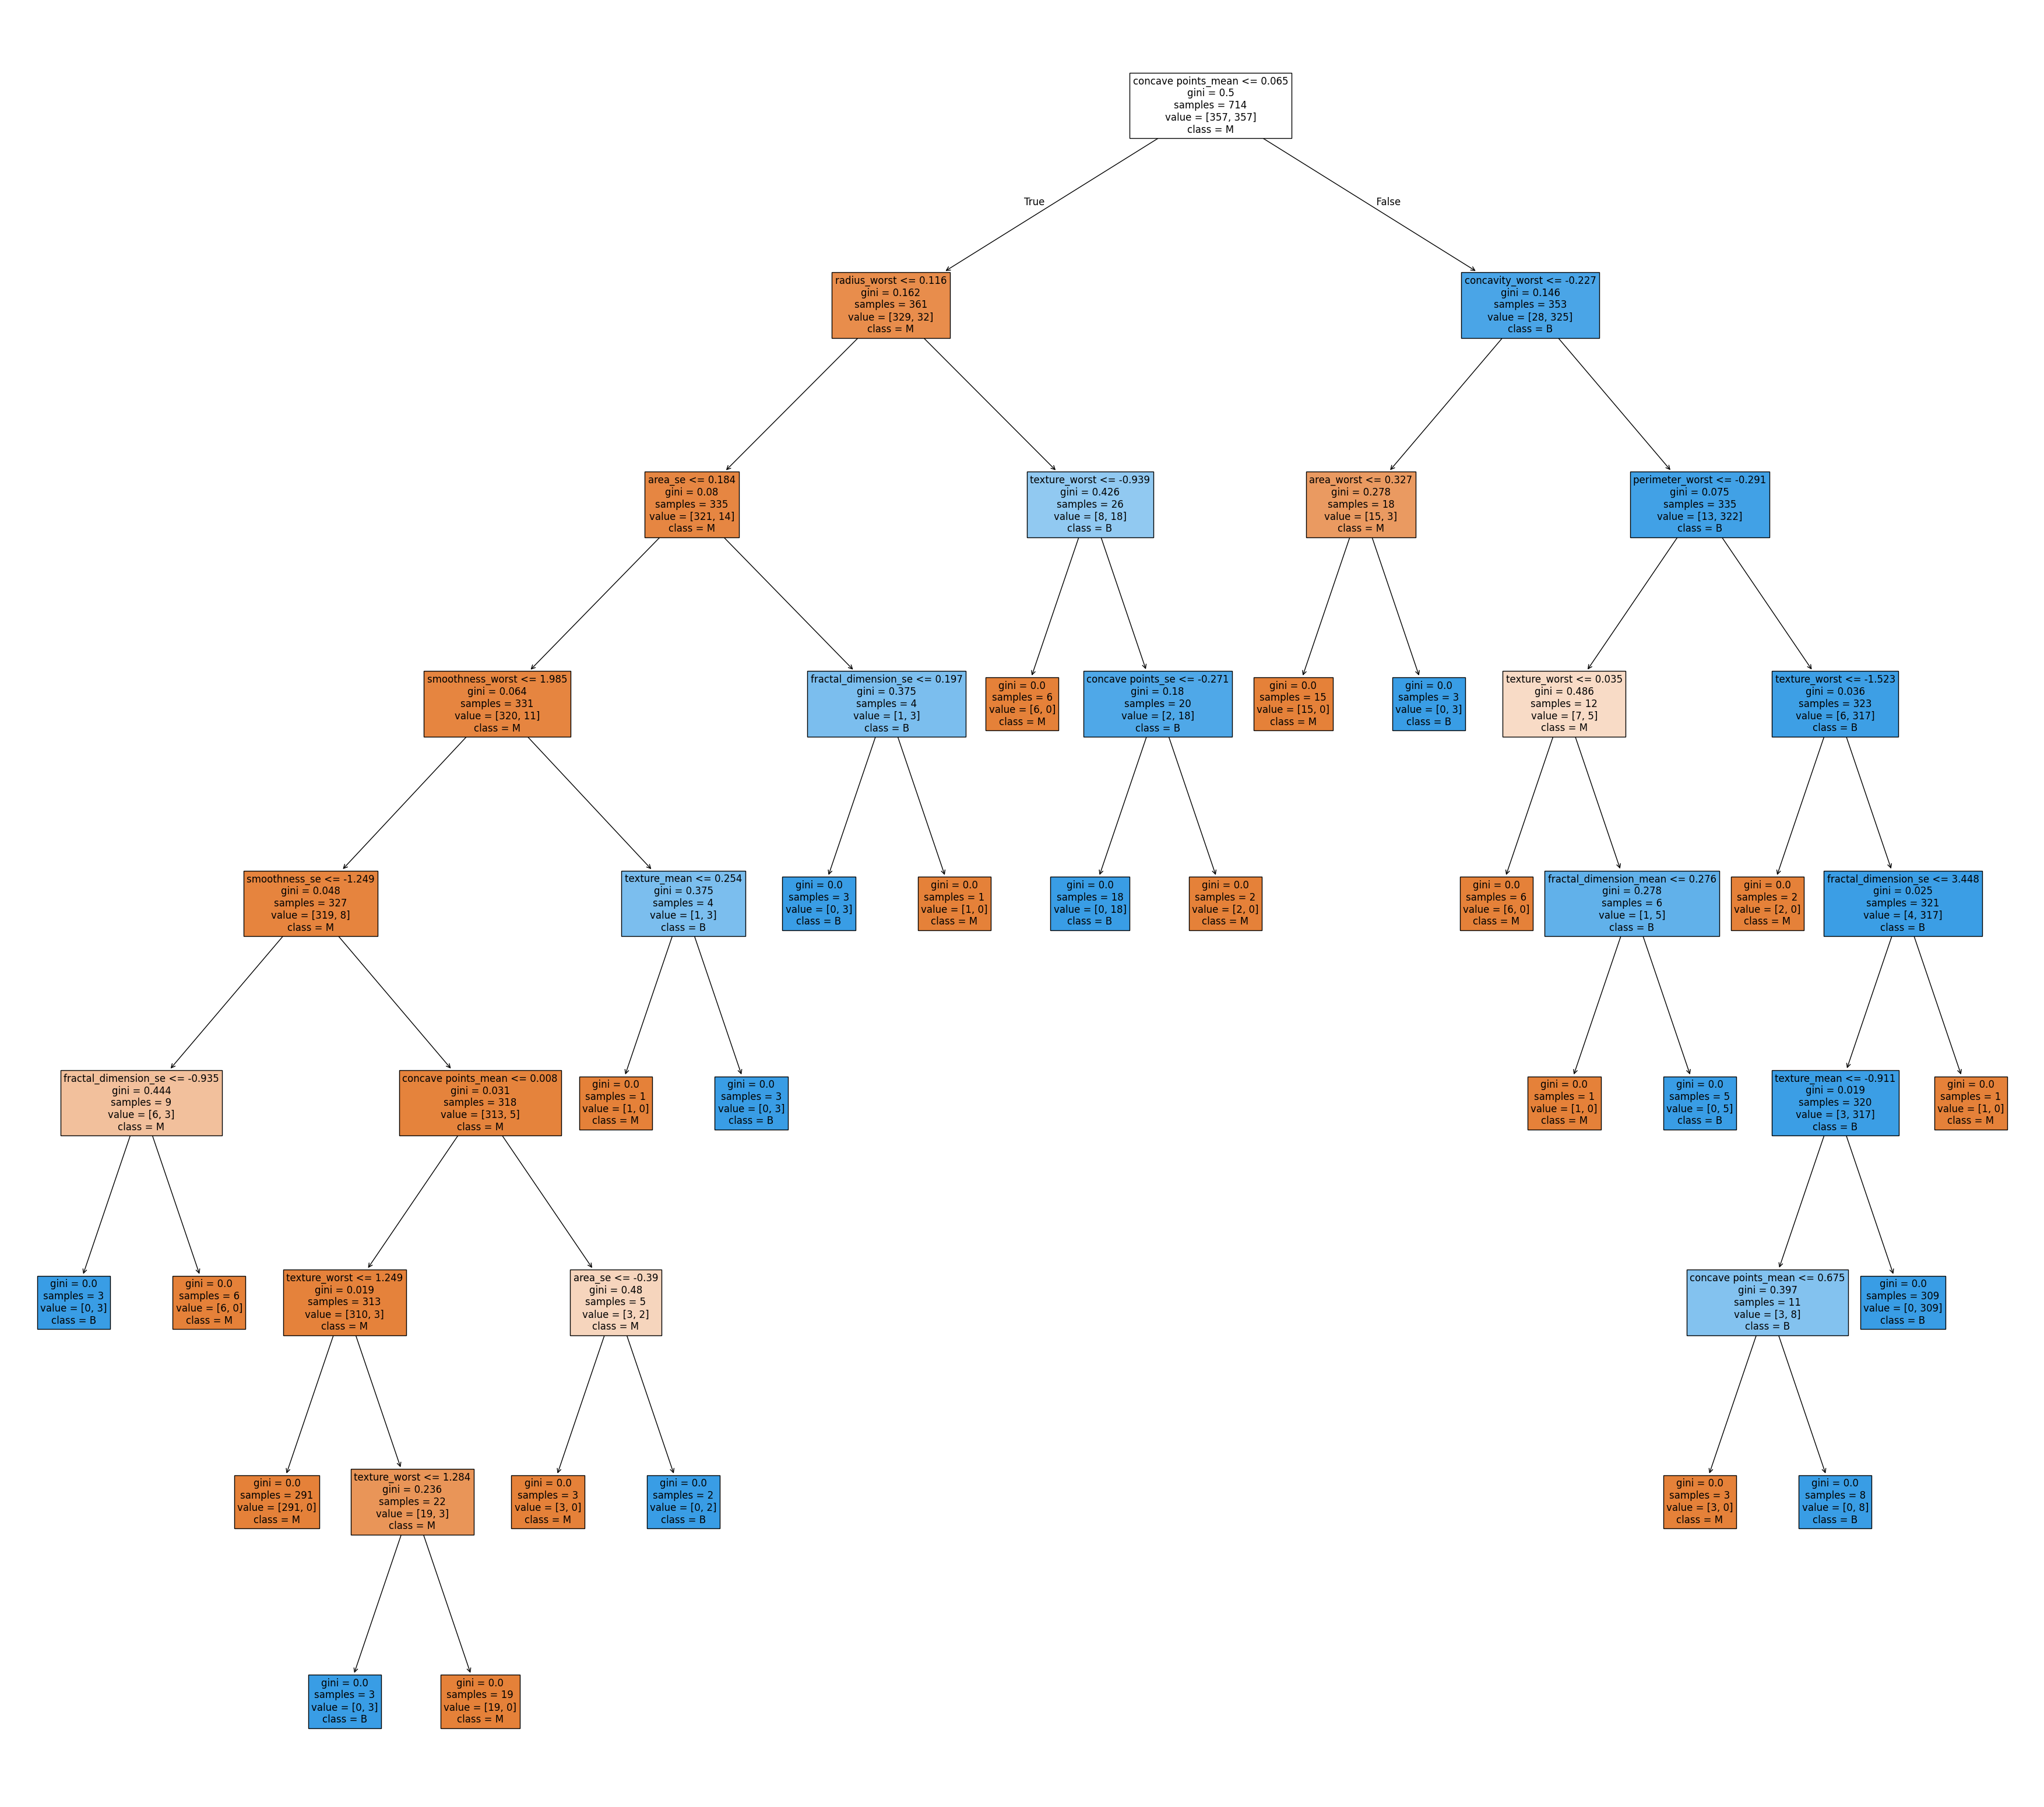

In [36]:
fig_tree = plt.figure(figsize=(45, 40))
tree_plot = tree.plot_tree(tree_model,
                           feature_names=feature_names,
                           class_names=["M", "B"],
                           filled=True,
                           fontsize=12)

In [75]:
print(classification_report(y_test,predict_tree))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        72
           1       0.82      0.79      0.80        42

    accuracy                           0.86       114
   macro avg       0.85      0.84      0.85       114
weighted avg       0.86      0.86      0.86       114



## Regression Tree

In [38]:
y_numeric = y['Diagnosis'].replace({'M': 1, 'B': 0})
x_train, x_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=1)

C:\Users\juan_\AppData\Local\Temp\ipykernel_12564\1366856927.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_numeric = y['Diagnosis'].replace({'M': 1, 'B': 0})


In [39]:
Regression_model = DecisionTreeRegressor().fit(x_train,y_train)
Regression_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [40]:
score_Regression = Regression_model.score(x_test, y_test)
score_Regression

0.736111111111111

In [80]:
Regression_predict = cross_val_predict(Regression_model,x_test,y_test)


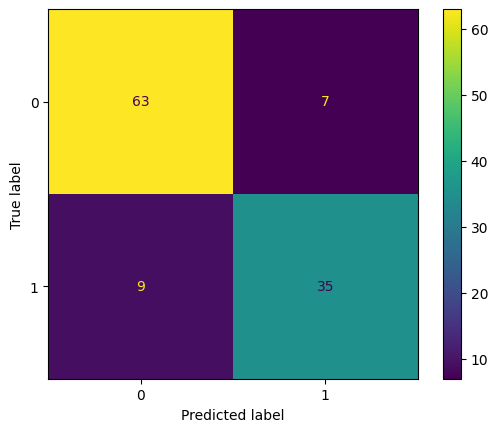

In [81]:
Regre_matrix = confusion_matrix(Regression_predict,y_test)
Regre_display = ConfusionMatrixDisplay(Regre_matrix)
Regre_display.plot()

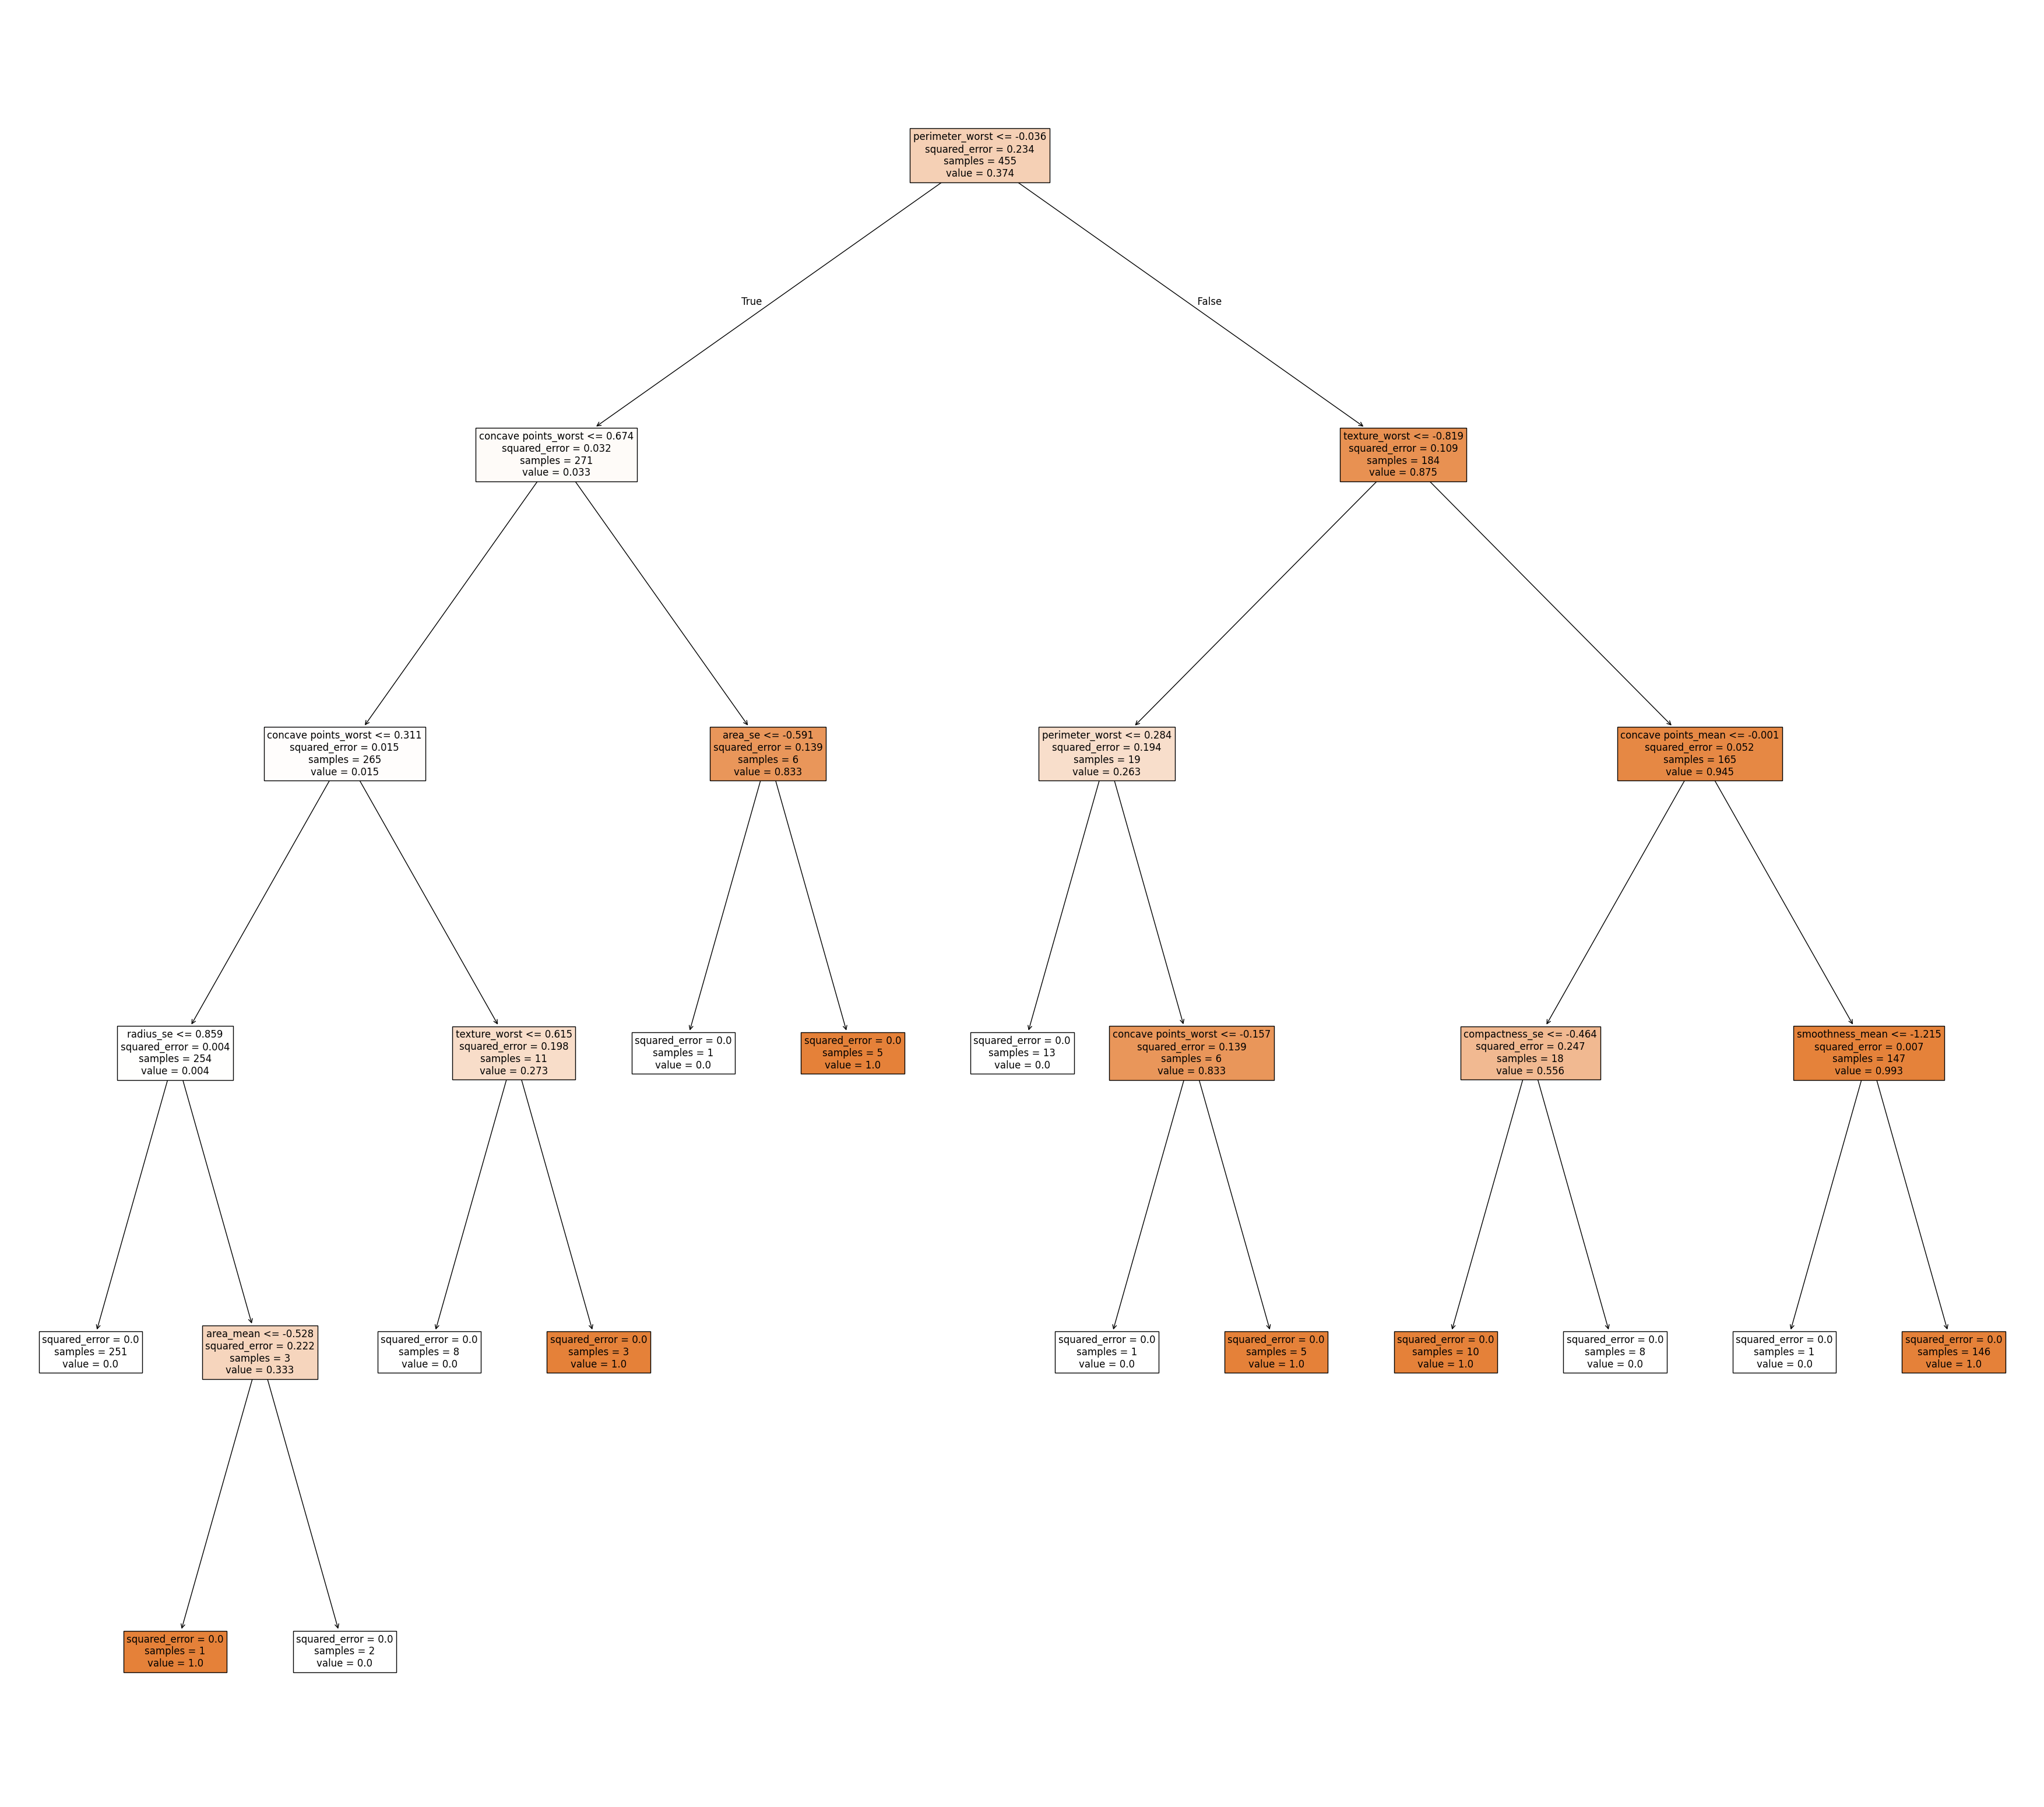

In [43]:
fig_tree = plt.figure(figsize=(45, 40))
tree_plot = tree.plot_tree(Regression_model,
                           feature_names=feature_names,
                           class_names=[1, 0],
                           filled=True,
                           fontsize=12)

In [82]:
print(classification_report(y_test, Regression_predict))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        72
           1       0.80      0.83      0.81        42

    accuracy                           0.86       114
   macro avg       0.85      0.85      0.85       114
weighted avg       0.86      0.86      0.86       114

